# 3章 ニューラルネットワーク

パーセプトロンは複雑な関数を表現できるが、重みは人力で設定する必要があった。
ニューラルネットワークでは適切な重みパラメータをデータから自動で学習できる性質が備わっている

## 3.1 パーセプトロンからニューラルネットワークへ

### 3.1.1 ニューラルネットワークの例
例として下図のようなネットワークがある。中間層は隠れ層とも呼ばれる。入力層から出力層へ向かい第0層、第1層、第2層と呼ぶ。(重みを持つ層は実質2層なので2層のネットワークと呼ぶ。書籍によっては異なるので注意。)




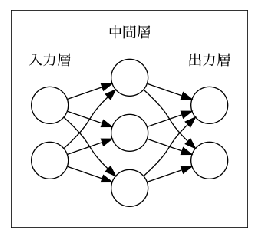

In [3]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from graphviz import Digraph

f = Digraph(format="png")
f.attr(rankdir='LR')

f.attr('node', shape='circle')

f.node('x1','')
f.node('x2','')
f.node('s1','')
f.node('s2','')
f.node('s3','')
f.node('y1','')
f.node('y2','')

with f.subgraph(name='cluster_1') as c:
    c.node('x1')
    c.node('x2')
    c.attr(color='white')
    c.attr(label='入力層')

with f.subgraph(name='cluster_2') as c:
    c.node('s1')
    c.node('s2')
    c.node('s3')
    c.attr(color='white')
    c.attr(label='中間層')

with f.subgraph(name='cluster_3') as c:
    c.node('y1')
    c.node('y2')
    c.attr(color='white')
    c.attr(label='出力層')

f.edge('x1', 's1', len='1.00')
f.edge('x1', 's2', len='10')
f.edge('x1', 's3', len='10')
f.edge('x2', 's1', len='10')
f.edge('x2', 's2', len='10')
f.edge('x2', 's3', len='10')
f.edge('s1', 'y1', len='10')
f.edge('s2', 'y1', len='10')
f.edge('s3', 'y1', len='10')
f.edge('s1', 'y2', len='10')
f.edge('s2', 'y2', len='10')
f.edge('s3', 'y2', len='10')


f.render("../docs/neural_network")

img = imread('../docs/neural_network.png')
plt.figure(figsize=(6,4))
plt.imshow(img)


ax = plt.gca() # get current axis

# 枠線非表示
#ax.spines["right"].set_color("none")  # 右消し
#ax.spines["left"].set_color("none")   # 左消し
#ax.spines["top"].set_color("none")    # 上消し
#ax.spines["bottom"].set_color("none") # 下消し

## 目盛を非表示にする
ax.tick_params(axis='x', which='both', top='off', bottom='off', labelbottom='off')
ax.tick_params(axis='y', which='both', left='off', right='off', labelleft='off')

plt.show()

### 3.1.2 パーセプトロンの復習

パーセプトロンは以下式で表すことができた。

$$
y
= \begin{cases}
 & \ 0 \; (b + w_{1}x_{1} + w_{1}x_{2} \leq 0) \\
 & \ 1 \; (b + w_{1}x_{1} + w_{1}x_{2} > 0)
\end{cases}
$$

バイアスはニューロンの発火のしやすさ、重みは各信号の重要性をコントロールしている。
上記の式を簡略化すると以下2つの式となる。

$$
y = h(b + w_{1}x_{1} + w_{1}x_{2})
$$
$$
h(x)
= \begin{cases}
 & \ 0 \; (x \leq 0) \\
 & \ 1 \; (x > 0)
\end{cases}
$$

入力信号の総和がh(x)という関数で変換されて出力yとなる。

### 3.1.3 活性化関数の登場
h(x)は一般的に活性化関数(activation function)と呼ばれる。

以前の活性化関数を含む式を変形すると以下といえる。

$$
a = b + w_{1}x_{1} + w_{1}x_{2}
$$
$$
y
= h(a)
$$

これを図示すると以下となる。




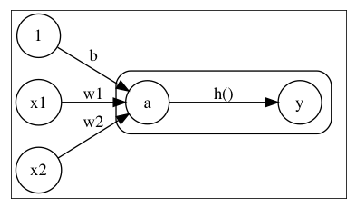

In [4]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from graphviz import Digraph

f = Digraph(format="png")
f.attr(rankdir='LR')

f.attr('node', shape='circle')

with f.subgraph(name='cluster_0') as c:
    c.edge('a', 'y', label='h()')
    c.attr(style='rounded')
    

f.edge('1', 'a', label='b')
f.edge('x1', 'a', label='w1')
f.edge('x2', 'a', label='w2')


f.render("../docs/activation_function")

img = imread('../docs/activation_function.png')
plt.figure(figsize=(6,4))
plt.imshow(img)

ax = plt.gca() # get current axis

# 枠線非表示
#ax.spines["right"].set_color("none")  # 右消し
#ax.spines["left"].set_color("none")   # 左消し
#ax.spines["top"].set_color("none")    # 上消し
#ax.spines["bottom"].set_color("none") # 下消し

## 目盛を非表示にする
ax.tick_params(axis='x', which='both', top='off', bottom='off', labelbottom='off')
ax.tick_params(axis='y', which='both', left='off', right='off', labelleft='off')

plt.show()

## 3.2 活性化関数
閾値を堺にして出力が切り替わる関数は「ステップ関数」、「階段関数」と呼ばれる。
パーセプトロンでは活性化関数にステップ関数を用いていた。

ニューラルネットワークでは活性化関数を別の関数に変更する。


## 3.2.1 シグモイド関数

活性化関数としてシグモイド関数を用いる

$$
h(x) = \frac{1}{1+exp(-x)}
$$

exp(-x)は$e^{-x}$を表す。  


### 3.2.2 ステップ関数の実装

In [5]:
# xは実数のみ
import numpy as np
def step_function_from_num(x):
    if x > 0:
        return 1
    else:
        return 0


# 配列対応の場合
def step_function_from_array(x):
    y = x > 0
    return y.astype(np.int)

print(step_function_from_array(np.array([-0.1, 0, 1])))

[0 0 1]


### 3.2.3 ステップ関数のグラフ


/Users/smap3/PycharmProjects/exercise_of_deep_larning_from_scratch/env/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


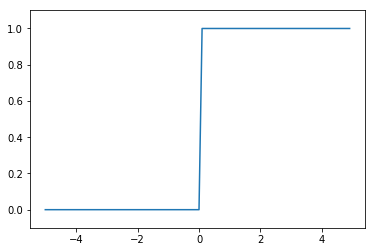

In [6]:
import numpy as np
import matplotlib.pylab as plt


def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.4 シグモイド関数の実装



In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
print(sigmoid(x))

[ 0.26894142  0.73105858  0.88079708]


/Users/smap3/PycharmProjects/exercise_of_deep_larning_from_scratch/env/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


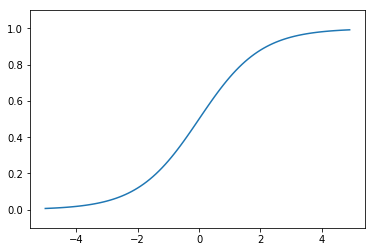

In [8]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.5 シグモイド関数とステップ関数の比較

シグモイド関数はステップ関数と比べるとなめらかなグラフになる。(実践がシグモイド、破線がステップ)
ステップ関数は0or1を返却するが、シグモイド関数は0~1の間の実数を返す。共通の性質としては入力が以下に小さいもしくは大きくてもその値域は[0,1]となる。



/Users/smap3/PycharmProjects/exercise_of_deep_larning_from_scratch/env/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


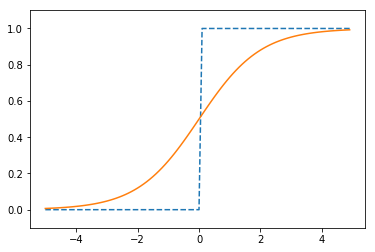

In [9]:
x = np.arange(-5.0, 5.0, 0.1)
y_step = step_function(x)
y_sig = sigmoid(x)
plt.plot(x, y_step, '--')
plt.plot(x, y_sig)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.6 非線形関数

ステップ関数とシグモイド関数の共通点としては、非線形関数であるということ。(線形は直線、非線形は曲線を描く)
ニューラルネットワークでは活性化関数に線形関数を用いてはいけない。それは層を深くすることの意味がなくなってしまうため。

### 3.2.7 ReLU関数

活性化関数にReLU(Rectified Linear Unit)が用いられる事がある。数式で表すと以下。

$$
y
= \begin{cases}
 & \ x \; (x > 0) \\
 & \ 0 \; (x \leq 0)
\end{cases}
$$


[0 0 5]


/Users/smap3/PycharmProjects/exercise_of_deep_larning_from_scratch/env/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


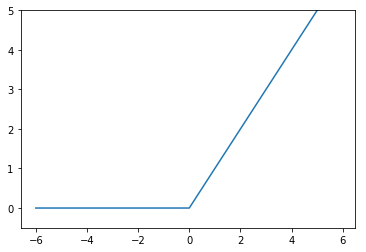

In [10]:
def relu(x):
    return np.maximum(0, x)

print(relu(np.array([-2, 0, 5])))

x = np.arange(-6.0, 6.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.5, 5)
plt.show()

## 3.3 多次元配列の計算

### 3.3.1 多次元配列


In [11]:
import numpy as np

A = np.array([1, 2, 3, 4])
print(A)

print(np.ndim(A)) # 次元数
print(A.shape) # 4行,
print(A.shape[0]) # 添字0次元のデータ数

[1 2 3 4]
1
(4,)
4


In [12]:
import numpy as np

B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)

print(np.ndim(B)) # 次元数
print(B.shape) # 3行2列
print(B.shape[0]) # 添字0次元のデータ数

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)
3


### 3.3.2 行列の内積



In [13]:
# 行列の内積
A = np.array([[1,2], [3,4]])
print(A.shape)

B = np.array([[5,6], [7,8]])
print(B.shape)

print(np.dot(A, B))

(2, 2)
(2, 2)
[[19 22]
 [43 50]]


In [14]:
# 行列の内積
A = np.array([[1,2,3], [4,5,6]])
print(A.shape)

B = np.array([[1,2], [3,4], [5,6]])
print(B.shape)

print(np.dot(A, B))

(2, 3)
(3, 2)
[[22 28]
 [49 64]]


In [15]:
# 行列の内積
A = np.array([[1,2], [3,4], [5,6]])
print(A.shape)

B = np.array([7,8])
print(B.shape)

print(np.dot(A, B))

(3, 2)
(2,)
[23 53 83]


### 3.3.3 ニューラルネットワークの内積

バイアスと活性化関数を省略し、重みだけのニューラルネットワークの実装を行なう。
行列の内積を用いるとループなどを用いずに一度に計算することができる。

In [16]:
# 入力
X = np.array([1, 2])
print(X.shape)

# 重み
W = np.array([[1,3,5], [2,4,6]])
print(W)
print(W.shape)

# ニューラルネットワークの内積
Y = np.dot(X, W)
print(Y)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


## 3.4 3層ニューラルネットワークの実装

### 3.4.1 記号の確認
ここでは以下のように重みを表現する。

$$
w_{1 \; 2}^{(1)}
$$

上段((1))は第1層目の重み
下段左(1)は次層の1番目のニューロン、
下段右(2)は前層の2番目のニューロンを表す。


### 3.4.2 角層における信号伝達の実装

第1層目の1番目のニューロンへ信号伝達は以下式となる。

$$
a_{1}^{(1)} = w_{1\;1}^{(1)} + w_{1\;2}^{(1)} + b_{1}^{(1)}
$$

行列の内積を用いると以下式で表される。

$$
A_{1}^{(1)} = XW^{(1)} + B^{(1)}
$$

$$
X = (x1 \; x2)
$$

$$
B^{(1)} = (b_{1}^{(1)} \; b_{2}^{(1)} \; b_{3}^{(1)})
$$

$$
W_{1} = \begin{pmatrix}
w_{1\;1}^{(1)} & w_{2\;1}^{(1)} & w_{3\;1}^{(1)} \\
w_{1\;2}^{(1)} & w_{2\;2}^{(1)} & w_{3\;2}^{(1)} \\
\end{pmatrix}
$$


実装は以下。

In [17]:
# 入力層から第1層

import numpy as np

X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

print(A1)

(2, 3)
(2,)
(3,)
[ 0.3  0.7  1.1]


活性化関数としてシグモイド関数を利用した場合は以下となる。
重み付き和はa、活性化関数で変換された信号をzとする。活性化関数はh()とする。



In [18]:
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[ 0.3  0.7  1.1]
[ 0.57444252  0.66818777  0.75026011]


In [19]:
# 第1層から第2層

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [20]:
# 第2層から出力層


def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

print(Y)

[ 0.31682708  0.69627909]


### 3.4.3 実装のまとめ

これまで行った実装をまとめると以下となる。ニューラルネットワークの慣例として重みだけは大文字をもちいてWを使用する。


In [28]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network


def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[ 0.31682708  0.69627909]


## 3.5 出力層の設計

分類問題と回帰問題のどちらに用いるかで、出力層の活性化関数を変更する必要がある

例）
* 分類
各クラスに属する確率

* 回帰
数値

### 3.5.1 恒等関数とソフトマックス関数
恒等関数は入力をそのまま出力する関数。(回帰で利用)


ソフトマックス関数は以下で表される。(分類で利用)
出力層がn個あった場合に、k番目の出力$y_{k}$を求める式。

$$
y_{k} = \frac{exp(a_{k})}{\sum_{i=1}^{n}exp(a_{i})}
$$





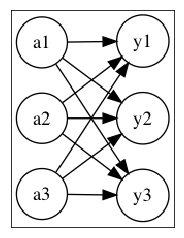

In [36]:
# ソフトマックス関数

import matplotlib.pyplot as plt
from matplotlib.image import imread
from graphviz import Digraph

f = Digraph(format="png")
f.attr(rankdir='LR')

f.attr('node', shape='circle')

f.edge('a1', 'y1', len='10')
f.edge('a2', 'y1', len='10')
f.edge('a3', 'y1', len='10')
f.edge('a1', 'y2', len='10')
f.edge('a2', 'y2', len='10')
f.edge('a3', 'y2', len='10')
f.edge('a1', 'y3', len='10')
f.edge('a2', 'y3', len='10')
f.edge('a3', 'y3', len='10')


f.render("../docs/neural_network")

img = imread('../docs/neural_network.png')
plt.figure(figsize=(6,4))
plt.imshow(img)


ax = plt.gca() # get current axis

# 枠線非表示
#ax.spines["right"].set_color("none")  # 右消し
#ax.spines["left"].set_color("none")   # 左消し
#ax.spines["top"].set_color("none")    # 上消し
#ax.spines["bottom"].set_color("none") # 下消し

## 目盛を非表示にする
ax.tick_params(axis='x', which='both', top='off', bottom='off', labelbottom='off')
ax.tick_params(axis='y', which='both', left='off', right='off', labelleft='off')

plt.show()

In [37]:
# ソフトマックス関数の実装

a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[  1.34985881  18.17414537  54.59815003]
74.1221542102
[ 0.01821127  0.24519181  0.73659691]


In [ ]:
# 関数として定義


def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 3.5.3 ソフトマックス関数の実装上の注意

指数関数の計算を行なう際、大きな値になってしまいオーバーフローを起こすおそれがある。ソフトマックス中の分子分母両者の指数関数の計算において定数を減算することによって桁あふれを防ぐ。(結果は変わらない)
定数は入力信号の最大値を用いることが一般的。

$$
y_{k} = \frac{exp(a_{k})}{\sum_{i=1}^{n}exp(a_{i})} \\
= \frac{exp(a_{k})}{\sum_{i=1}^{n}exp(a_{i})} \\
= \frac{Cexp(a_{k})}{C\sum_{i=1}^{n}exp(a_{i})} \\
= \frac{exp(a_{k} + logC)}{\sum_{i=1}^{n}exp(a_{i} + logC)} \\
= \frac{exp(a_{k} + C')}{\sum_{i=1}^{n}exp(a_{i} + C')} \\
$$

In [44]:
# オーバーフローの再現と改善の検証
a = np.array([1010, 1000, 990])
print(np.exp(a) / np.sum(np.exp(a)))

c = np.max(a)
print(a - c)

print(np.exp(a - c) / np.sum(np.exp(a - c)))

[ nan  nan  nan]
[  0 -10 -20]
[  9.99954600e-01   4.53978686e-05   2.06106005e-09]


/Users/smap3/PycharmProjects/exercise_of_deep_larning_from_scratch/env/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/smap3/PycharmProjects/exercise_of_deep_larning_from_scratch/env/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
# ソフトマックス関数(改善)の実装

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y